## Random walk

Choose number between 0 and 1:

In [1]:
rand()

0.5931508776088295

In [2]:
function jump()
    r = rand() 
    
    if r < 0.5
        return -1
    else
        return +1
    end
end

jump (generic function with 1 method)

In [11]:
jump()

1

In [18]:
rand(0:1)

1

In [19]:
rand( (0, 1) )

1

In [20]:
rand(-1:2:1)

-1

In [21]:
rand( (-1, +1) )

-1

In [31]:
rand(Bool) * 2 - 1

-1

In [32]:
function walk(N)
    x = 0 # initial position 
    positions = [x] # store the positions


    for i in 1:N
        x += jump()
        push!(positions, x)
    end
    return positions 
end

walk (generic function with 1 method)

UndefVarError: UndefVarError: positions not defined

In [36]:
positions = walk(100)

101-element Array{Int64,1}:
  0
 -1
  0
  1
  0
  1
  2
  1
  2
  1
  2
  3
  4
  ⋮
  5
  4
  5
  6
  7
  8
  7
  6
  5
  4
  5
  4

In [38]:
using Plots

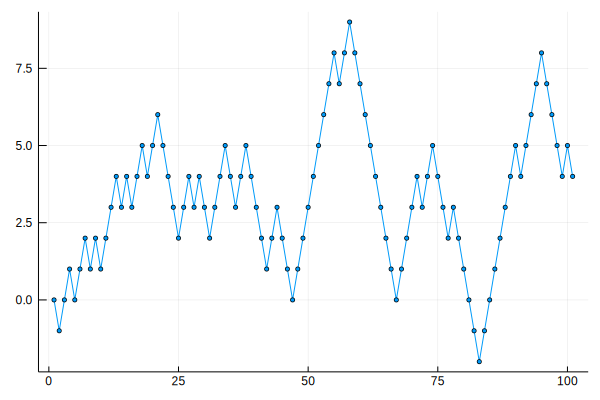

In [42]:
plot(positions, m=:2, leg=false)  # or plot(walk(100))

In [47]:
p = plot(leg=false)

num_walks = 100
final_time = 200

for i in 1:num_walks
    positions = walk(final_time)
    plot!(positions, m=:1, alpha=0.2)
end

xlabel!("time n")
p


In [48]:
walk(100)

101-element Array{Int64,1}:
  0
  1
  2
  1
  0
 -1
 -2
 -3
 -2
 -3
 -4
 -5
 -4
  ⋮
  7
  8
  9
  8
  9
  8
  9
  8
  9
 10
  9
  8

Array comprehension:

In [50]:
walker_data = [walk(100) for i in 1:200]

200-element Array{Array{Int64,1},1}:
 [0, -1, -2, -1, 0, -1, -2, -1, 0, -1  …  -15, -16, -17, -16, -17, -18, -17, -18, -19, -20]  
 [0, -1, -2, -1, -2, -3, -4, -5, -6, -7  …  -23, -24, -25, -26, -27, -28, -27, -28, -27, -26]
 [0, 1, 2, 1, 2, 3, 2, 1, 0, -1  …  5, 4, 3, 4, 5, 4, 5, 4, 3, 4]                            
 [0, 1, 0, -1, 0, -1, 0, 1, 0, -1  …  -7, -6, -5, -4, -5, -6, -5, -6, -5, -6]                
 [0, 1, 0, 1, 2, 1, 2, 1, 0, -1  …  1, 0, -1, -2, -1, -2, -1, 0, -1, 0]                      
 [0, -1, 0, 1, 2, 3, 2, 3, 2, 1  …  17, 18, 19, 20, 21, 22, 21, 20, 21, 20]                  
 [0, 1, 2, 3, 4, 3, 2, 3, 2, 1  …  -1, -2, -3, -4, -3, -2, -1, 0, 1, 0]                      
 [0, -1, -2, -1, -2, -3, -4, -3, -4, -5  …  -1, -2, -3, -2, -1, -2, -3, -4, -5, -6]          
 [0, 1, 2, 3, 4, 5, 6, 5, 4, 3  …  11, 10, 9, 10, 11, 10, 11, 12, 11, 10]                    
 [0, -1, 0, -1, -2, -3, -2, -3, -2, -3  …  -3, -2, -3, -2, -3, -4, -5, -6, -7, -8]           
 [0, 1, 2, 1, 2, 1, 2, 

In [51]:
hcat(walker_data...)  # splat -- like * in Python

101×200 Array{Int64,2}:
   0    0   0   0   0   0   0   0   0  …   0   0    0    0   0   0   0   0
  -1   -1   1   1   1  -1   1  -1   1     -1   1   -1   -1  -1  -1  -1  -1
  -2   -2   2   0   0   0   2  -2   2     -2   0    0   -2  -2  -2  -2  -2
  -1   -1   1  -1   1   1   3  -1   3     -1   1   -1   -3  -1  -1  -1  -1
   0   -2   2   0   2   2   4  -2   4     -2   2    0   -2   0   0  -2  -2
  -1   -3   3  -1   1   3   3  -3   5  …  -1   1   -1   -1  -1  -1  -1  -1
  -2   -4   2   0   2   2   2  -4   6      0   0   -2    0   0  -2  -2   0
  -1   -5   1   1   1   3   3  -3   5     -1  -1   -3    1  -1  -3  -3   1
   0   -6   0   0   0   2   2  -4   4     -2   0   -4    0  -2  -4  -4   0
  -1   -7  -1  -1  -1   1   1  -5   3     -3   1   -5   -1  -1  -3  -3   1
  -2   -8   0   0  -2   0   2  -4   4  …  -4   2   -4    0   0  -2  -4   0
  -3   -7  -1  -1  -3  -1   1  -5   5     -3   3   -3    1  -1  -3  -3   1
  -2   -8  -2  -2  -2   0   0  -6   6     -4   2   -4    0   0  -4  -2   2
 

In [61]:
M = reduce(hcat, walker_data)'  # splat -- like * in Python   # ' is transpose (apostrophe)

200×101 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 0  -1  -2  -1   0  -1  -2  -1   0  -1  …  -16  -17  -18  -17  -18  -19  -20
 0  -1  -2  -1  -2  -3  -4  -5  -6  -7     -26  -27  -28  -27  -28  -27  -26
 0   1   2   1   2   3   2   1   0  -1       4    5    4    5    4    3    4
 0   1   0  -1   0  -1   0   1   0  -1      -4   -5   -6   -5   -6   -5   -6
 0   1   0   1   2   1   2   1   0  -1      -2   -1   -2   -1    0   -1    0
 0  -1   0   1   2   3   2   3   2   1  …   20   21   22   21   20   21   20
 0   1   2   3   4   3   2   3   2   1      -4   -3   -2   -1    0    1    0
 0  -1  -2  -1  -2  -3  -4  -3  -4  -5      -2   -1   -2   -3   -4   -5   -6
 0   1   2   3   4   5   6   5   4   3      10   11   10   11   12   11   10
 0  -1   0  -1  -2  -3  -2  -3  -2  -3      -2   -3   -4   -5   -6   -7   -8
 0   1   2   1   2   1   2   1   0   1  …    2    3    2    3    4    5    6
 0   1   0   1   0  -1  -2  -1   0  -1       8    7    8    9   10   11   12
 0  -1  -2  -1  -2  -3 

In [55]:
zeros(Int, 200, 101)

200×101 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [56]:
[i + j for i in 1:5, j in 1:6]

5×6 Array{Int64,2}:
 2  3  4  5   6   7
 3  4  5  6   7   8
 4  5  6  7   8   9
 5  6  7  8   9  10
 6  7  8  9  10  11

In [57]:
hcat([1, 2, 3], [4, 5, 6])

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

In [58]:
[i + j for i in 1:5, j in 1:6]  # comma makes a matrix

5×6 Array{Int64,2}:
 2  3  4  5   6   7
 3  4  5  6   7   8
 4  5  6  7   8   9
 5  6  7  8   9  10
 6  7  8  9  10  11

In [60]:
[i + j for i in 1:5 for j in i:6]  # comma makes a matrix

20-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  4
  5
  6
  7
  8
  6
  7
  8
  9
  8
  9
 10
 10
 11

In [62]:
M[2, 3]  # row 2, column 3

-2

In [63]:
M[2, 3:4]

2-element Array{Int64,1}:
 -2
 -1

In [64]:
M[1:2, 3:4]

2×2 Array{Int64,2}:
 -2  -1
 -2  -1

In [65]:
M[:, 3]

200-element Array{Int64,1}:
 -2
 -2
  2
  0
  0
  0
  2
 -2
  2
  0
  2
  0
 -2
  ⋮
  2
  0
 -2
 -2
 -2
  0
  0
 -2
 -2
 -2
 -2
 -2

## Walker types

In [66]:
abstract type Walker end

mutable struct DiscreteWalker <: Walker
    x::Int
end

mutable struct ContinuousWalker <: Walker
    x::Float64
end

In [67]:
Walker(10)

MethodError: MethodError: no constructors have been defined for Walker

In [69]:
d = DiscreteWalker(10)

DiscreteWalker(10)

In [71]:
typeof(d)

DiscreteWalker

In [72]:
d.x

10

In [73]:
DiscreteWalker("hello")

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [74]:
methods(DiscreteWalker)

# 2 methods for type constructor:
[1] DiscreteWalker(x::Int64) in Main at In[66]:4
[2] DiscreteWalker(x) in Main at In[66]:4

In [75]:
DiscreteWalker(3.0)

DiscreteWalker(3)

In [76]:
DiscreteWalker(3.1)

InexactError: InexactError: Int64(3.1)

In [77]:
# subtype
position(w::Walker) = w.x

position (generic function with 1 method)

In [78]:
position(d)

10

In [79]:
c = ContinuousWalker(3.1)

ContinuousWalker(3.1)

In [80]:
position(c)

3.1

In [81]:
@code_typed position(c)

CodeInfo(
1 ─ %1 = Base.getfield(w, :x)::Float64
└──      return %1
) => Float64

In [82]:
@code_typed position(d)

CodeInfo(
1 ─ %1 = Base.getfield(w, :x)::Int64
└──      return %1
) => Int64

In [83]:
jump()

-1

In [84]:
methods(jump)

# 1 method for generic function "jump":
[1] jump() in Main at In[2]:2

In [85]:
jump(w::DiscreteWalker) = rand( (-1, +1) )

jump (generic function with 2 methods)

In [86]:
jump(w::ContinuousWalker) = rand() - 0.5

jump (generic function with 3 methods)

In [87]:
methods(jump)

# 3 methods for generic function "jump":
[1] jump(w::ContinuousWalker) in Main at In[86]:1
[2] jump(w::DiscreteWalker) in Main at In[85]:1
[3] jump() in Main at In[2]:2

In [88]:
jump(d)

1

In [89]:
jump(c)

0.32579455074635844

In [90]:
@which jump(c)

jump(w::ContinuousWalker) in Main at In[86]:1

In [92]:
function set_position!(w::Walker, x)
    w.x = x
end

set_position! (generic function with 1 method)

In [94]:
function walk!(w::Walker, N)
    positions = [position(w)]
    for i in 1:N
        x = position(w)
        new_x = x + jump(w)
        set_position!(w, new_x)
        push!(positions, new_x)
    end
        
    return positions 
end
# modifies its argument

walk! (generic function with 1 method)

In [95]:
d

DiscreteWalker(10)

In [96]:
d = DiscreteWalker(0)

DiscreteWalker(0)

In [97]:
c = ContinuousWalker(0.0)

ContinuousWalker(0.0)

In [99]:
walk!(d, 100)

101-element Array{Int64,1}:
  0
 -1
 -2
 -1
  0
  1
  2
  3
  4
  3
  4
  5
  6
  ⋮
  3
  4
  3
  2
  3
  4
  5
  4
  5
  4
  3
  2

In [100]:
d

DiscreteWalker(2)

In [101]:
walk!(c, 100)

101-element Array{Float64,1}:
  0.0                  
 -0.04974843697461284  
 -0.08952524669068485  
  0.0018212390609009255
 -0.4903124414263189   
 -0.5499807191154016   
 -0.8429234032877884   
 -1.2523992221910492   
 -1.4685900712054654   
 -1.598206583656119    
 -1.9282711668435126   
 -2.0786995116223714   
 -2.5597298150762473   
  ⋮                    
 -3.2504163450432353   
 -3.1862424659393493   
 -3.2840737449478317   
 -3.3686610333631135   
 -3.2227539907718032   
 -3.6567038987685034   
 -3.69106899882318     
 -3.741777838715322    
 -3.742023847456399    
 -3.886925634223334    
 -4.11123472455668     
 -4.588762965262629    

In [102]:
c

ContinuousWalker(-4.588762965262629)

In [103]:
mutable struct HelloWalker
    x::Int
    s::String
end

In [104]:
HelloWalker(3, "hello")

HelloWalker(3, "hello")

Check out `Parameters.jl` package: HelloWalker(x=3, y=4)